**Random Forest Classifier**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/diabetes_data.csv')
df.head()

,Age,BMI,BloodPressure,GlucoseLevel,InsulinLevel,PhysicalActivityLevel,FamilyHistory,Smoking,DiabetesRisk
0,58,27.0,73.2,84.9,91.2,2,0,0,0
1,71,24.9,87.1,95.8,72.2,5,0,0,0
2,48,33.4,77.9,58.5,74.0,4,0,0,0
3,34,26.5,78.8,146.2,56.5,4,0,0,0
4,62,31.7,79.7,102.1,79.7,5,1,0,1


In [ ]:
df.isna().sum()

,0
Age,0
BMI,0
BloodPressure,0
GlucoseLevel,0
InsulinLevel,0
PhysicalActivityLevel,0
FamilyHistory,0
Smoking,0
DiabetesRisk,0


In [ ]:
df.dtypes

,0
Age,int64
BMI,float64
BloodPressure,float64
GlucoseLevel,float64
InsulinLevel,float64
PhysicalActivityLevel,int64
FamilyHistory,int64
Smoking,int64
DiabetesRisk,int64


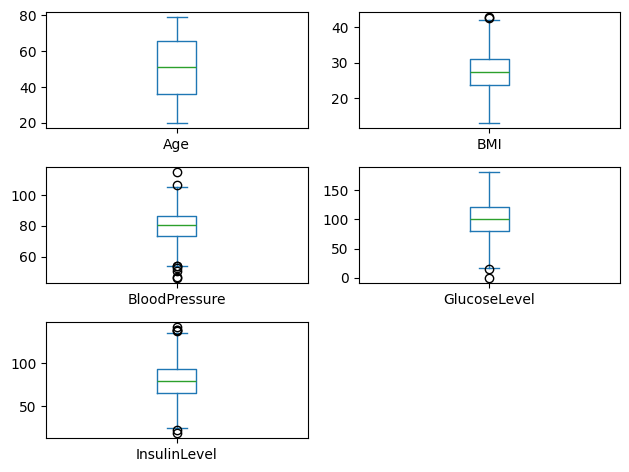

In [ ]:
num_continous_columns = ['Age' ,	'BMI' , 	'BloodPressure' , 	'GlucoseLevel' ,	'InsulinLevel']

for i in range(0,5):
  plt.subplot(3,2,i+1)
  df[num_continous_columns[i]].plot.box()

plt.tight_layout()
plt.show()

In [ ]:
df['BloodPressure'].describe()

,BloodPressure
count,1000.00000
mean,80.31540
std,9.74252
min,46.10000
25%,73.70000
50%,80.50000
75%,86.82500
max,115.00000


In [ ]:
df['GlucoseLevel'].describe()

,GlucoseLevel
count,1000.000000
mean,100.252200
std,30.090465
min,-0.200000
25%,79.750000
50%,100.500000
75%,121.925000
max,180.500000


In [ ]:
q1 = df['GlucoseLevel'].quantile(0.25)
print(q1)
q3 = df['GlucoseLevel'].quantile(0.75)
print(q3)
iqr = q3 - q1

79.75
121.92500000000001


In [ ]:
upper_limit_glucose = q3 + 1.5 * iqr
lower_limit_glucose = q1 - 1.5 * iqr

print(upper_limit_glucose , lower_limit_glucose)

185.18750000000003 16.487499999999983


In [ ]:
#handle outliers in glucose_level because it has some unreal values like 0 or negative glucose level
df['GlucoseLevel'] = df['GlucoseLevel'].clip(lower = lower_limit_glucose , upper = upper_limit_glucose)

In [ ]:
df['InsulinLevel'].describe()

,InsulinLevel
count,1000.000000
mean,79.542200
std,20.187362
min,19.100000
25%,65.700000
50%,79.700000
75%,93.625000
max,141.900000


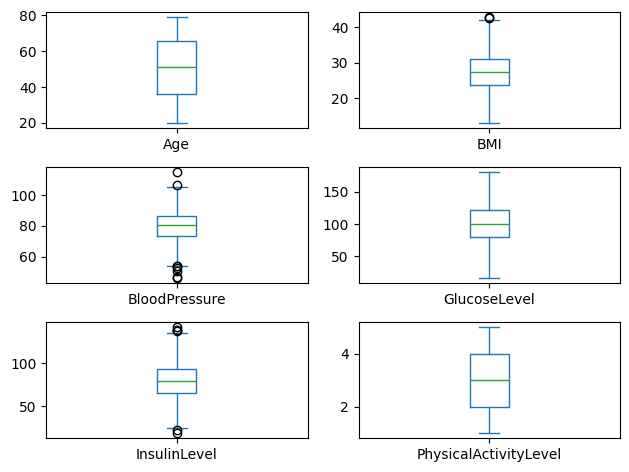

In [ ]:
num_continous_columns = ['Age' ,	'BMI' , 	'BloodPressure' , 	'GlucoseLevel' ,	'InsulinLevel' , 'PhysicalActivityLevel']

for i in range(0,6):
  plt.subplot(3,2,i+1)
  df[num_continous_columns[i]].plot.box()

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Age,BMI,BloodPressure,GlucoseLevel,InsulinLevel,PhysicalActivityLevel,FamilyHistory,Smoking,DiabetesRisk
0,58,27.0,73.2,84.9,91.2,2,0,0,0
1,71,24.9,87.1,95.8,72.2,5,0,0,0
2,48,33.4,77.9,58.5,74.0,4,0,0,0
3,34,26.5,78.8,146.2,56.5,4,0,0,0
4,62,31.7,79.7,102.1,79.7,5,1,0,1


In [ ]:
df['PhysicalActivityLevel'].value_counts()

,count
PhysicalActivityLevel,
2,226
1,199
3,193
5,192
4,190


In [ ]:
df['FamilyHistory'].value_counts()

,count
FamilyHistory,
0,705
1,295


In [ ]:
df['Smoking'].value_counts()

,count
Smoking,
0,772
1,228


In [ ]:
df['DiabetesRisk'].value_counts()

,count
DiabetesRisk,
0,589
1,411


In [ ]:
df.head()

,Age,BMI,BloodPressure,GlucoseLevel,InsulinLevel,PhysicalActivityLevel,FamilyHistory,Smoking,DiabetesRisk
0,58,27.0,73.2,84.9,91.2,2,0,0,0
1,71,24.9,87.1,95.8,72.2,5,0,0,0
2,48,33.4,77.9,58.5,74.0,4,0,0,0
3,34,26.5,78.8,146.2,56.5,4,0,0,0
4,62,31.7,79.7,102.1,79.7,5,1,0,1


In [ ]:
X = df.drop(columns = 'DiabetesRisk')
y = df['DiabetesRisk']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.75)

**random forest**

  * random forest classifier is an ensemble learning process in which multiple decision trees will be formed using different sets of data features.
  * Then based on what majority of the trees predicted, the final prediction will be defined.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelA = RandomForestClassifier(n_estimators = 100 , max_depth = 4)

modelA.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=4)

In [ ]:
print(modelA.score(xtrain,ytrain))
print(modelA.score(xtest,ytest))

0.9986666666666667
0.996


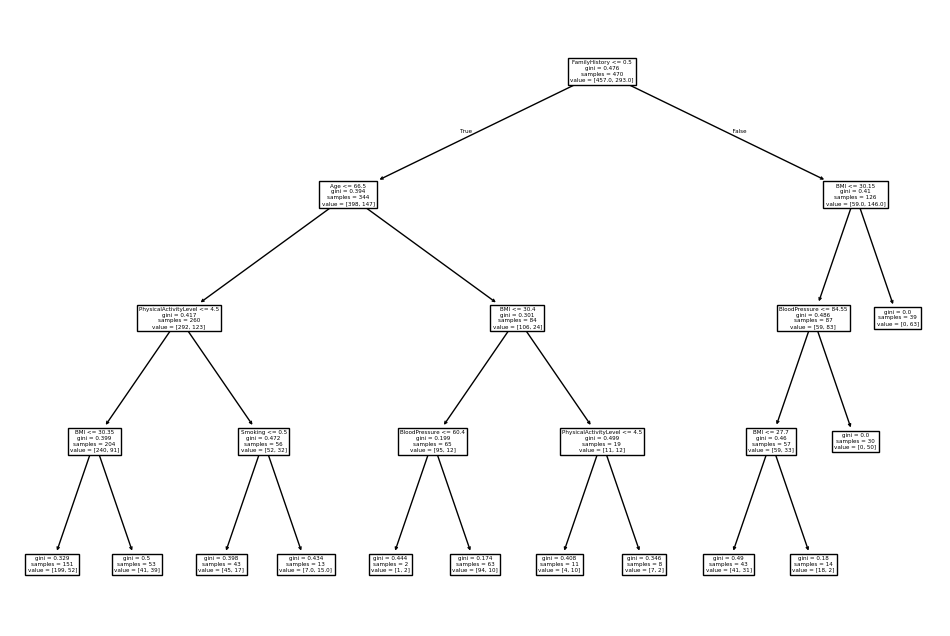

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (12,8))

plot_tree(modelA[50] , feature_names = xtrain.columns)

plt.show()

In [ ]:
print(modelA.predict([xtest.iloc[5]]))

[0]


In [ ]:
#We have 100 trees created by random forest classifier
#We can check predictions made by each tree
for i in range(0,100):
  print(modelA[i].predict([xtest.iloc[5]]))

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


In [ ]:
ytrainPred = modelA.predict(xtrain)
ytestPred = modelA.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytrain , ytrainPred))

[[448   0]
 [  1 301]]


In [ ]:
print(confusion_matrix(ytest , ytestPred))

[[141   0]
 [  1 108]]
